In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn as sk
from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation
from sklearn.naive_bayes import GaussianNB

C:\Users\ritesh\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv("BreastCancerWc.csv", sep=',', header=None, na_values=["?"])

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [4]:
df.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int64')

In [5]:
col_names = {0:'sample code number', 1:'clump thickness', 2:'uniformity of cell size', 3:'uniformity of cell shape', 4:'marginal adhesion', 5:'single epithelial cell size', 6:'bare nuclei', 7:'bland chromatin', 8:'normal nucleoli', 9:'mitoses', 10:'class'}
df = df.rename(columns=col_names)

In [6]:
df.describe()

,sample code number,clump thickness,uniformity of cell size,uniformity of cell shape,marginal adhesion,single epithelial cell size,bare nuclei,bland chromatin,normal nucleoli,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [7]:
df.head(20)

,sample code number,clump thickness,uniformity of cell size,uniformity of cell shape,marginal adhesion,single epithelial cell size,bare nuclei,bland chromatin,normal nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
5,1017122,8,10,10,8,7,10.0,9,7,1,4
6,1018099,1,1,1,1,2,10.0,3,1,1,2
7,1018561,2,1,2,1,2,1.0,3,1,1,2
8,1033078,2,1,1,1,2,1.0,1,1,5,2
9,1033078,4,2,1,1,2,1.0,2,1,1,2


In [8]:
df.tail(20)

,sample code number,clump thickness,uniformity of cell size,uniformity of cell shape,marginal adhesion,single epithelial cell size,bare nuclei,bland chromatin,normal nucleoli,mitoses,class
679,1368882,2,1,1,1,2,1.0,1,1,1,2
680,1369821,10,10,10,10,5,10.0,10,10,7,4
681,1371026,5,10,10,10,4,10.0,5,6,3,4
682,1371920,5,1,1,1,2,1.0,3,2,1,2
683,466906,1,1,1,1,2,1.0,1,1,1,2
684,466906,1,1,1,1,2,1.0,1,1,1,2
685,534555,1,1,1,1,2,1.0,1,1,1,2
686,536708,1,1,1,1,2,1.0,1,1,1,2
687,566346,3,1,1,1,2,1.0,2,3,1,2
688,603148,4,1,1,1,2,1.0,1,1,1,2


### i. Data cleaning(Remove NA, ?, Negative values etc.)

In [9]:
df = df.dropna()

In [10]:
for col in df.columns:
    df[col] = [x if x>=0 else np.nan for x in df[col]]

df = df.dropna()

In [11]:
df.head(50)

,sample code number,clump thickness,uniformity of cell size,uniformity of cell shape,marginal adhesion,single epithelial cell size,bare nuclei,bland chromatin,normal nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
5,1017122,8,10,10,8,7,10.0,9,7,1,4
6,1018099,1,1,1,1,2,10.0,3,1,1,2
7,1018561,2,1,2,1,2,1.0,3,1,1,2
8,1033078,2,1,1,1,2,1.0,1,1,5,2
9,1033078,4,2,1,1,2,1.0,2,1,1,2


### j. Error correcting(Outlier detection and removal)

In [12]:

subset_df = df

In [13]:
subset_df.head(5)

,sample code number,clump thickness,uniformity of cell size,uniformity of cell shape,marginal adhesion,single epithelial cell size,bare nuclei,bland chromatin,normal nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


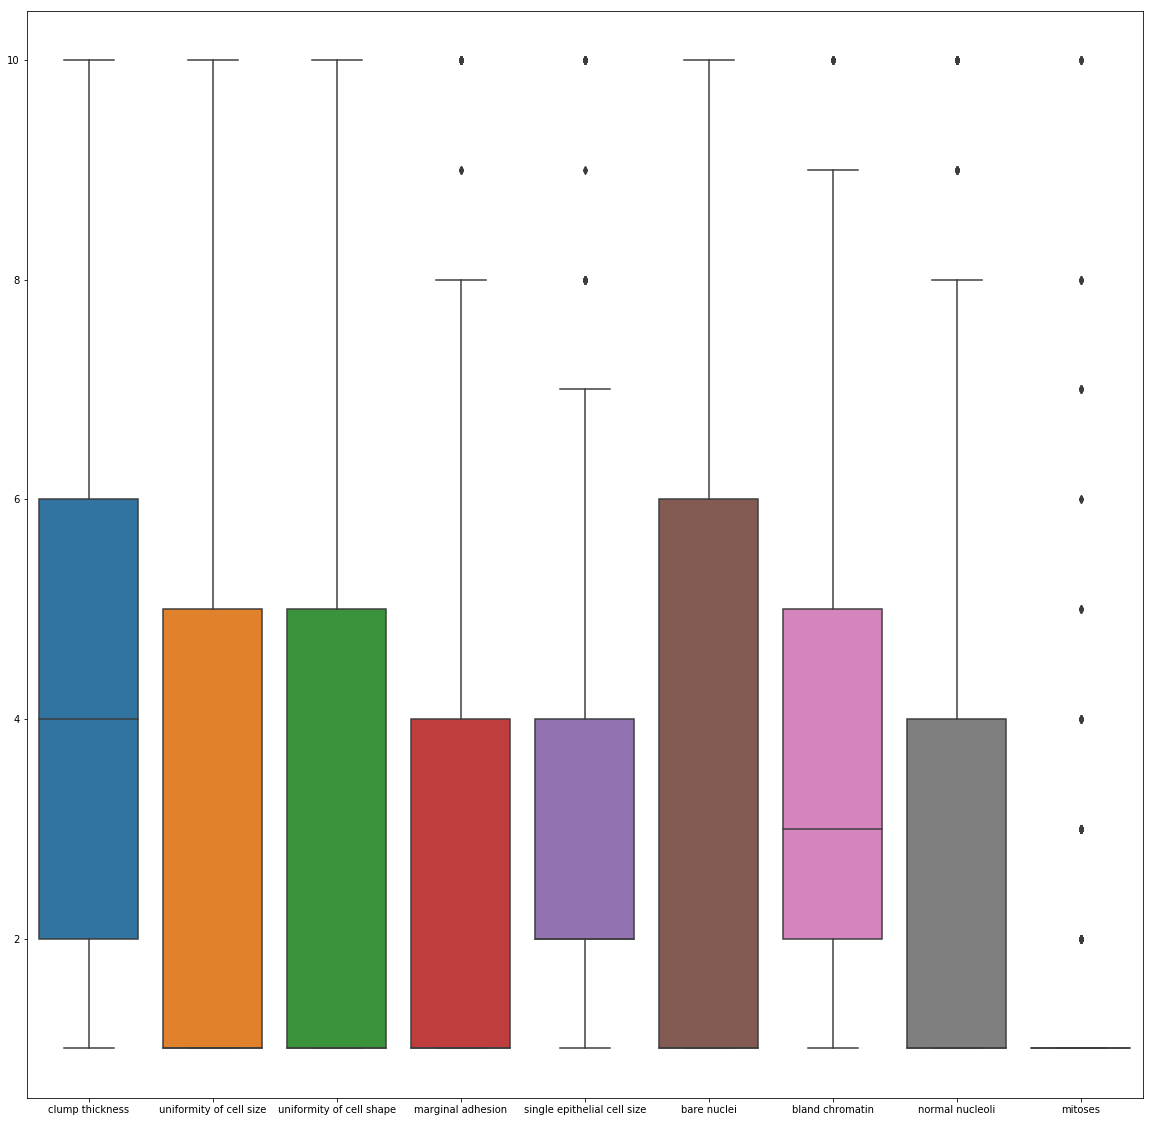

In [14]:
subset_df = df[[df.columns[1], df.columns[2], df.columns[3], df.columns[4], df.columns[5], df.columns[6], df.columns[7],
               df.columns[8], df.columns[9]]]
fig, ax = plt.subplots(figsize=(20, 20))
sns.boxplot(ax=ax, data=subset_df)

In [15]:
Q1 = df.quantile(.25)
Q3 = df.quantile(.75)
IQR = Q3 - Q1


In [16]:
outl = (Q3['marginal adhesion']+1.5*(IQR['marginal adhesion']))
df[df['marginal adhesion']> outl] = outl
subset_df = df[[df.columns[1], df.columns[2], df.columns[3], df.columns[4], df.columns[5], df.columns[6], df.columns[7],
               df.columns[8], df.columns[9]]]

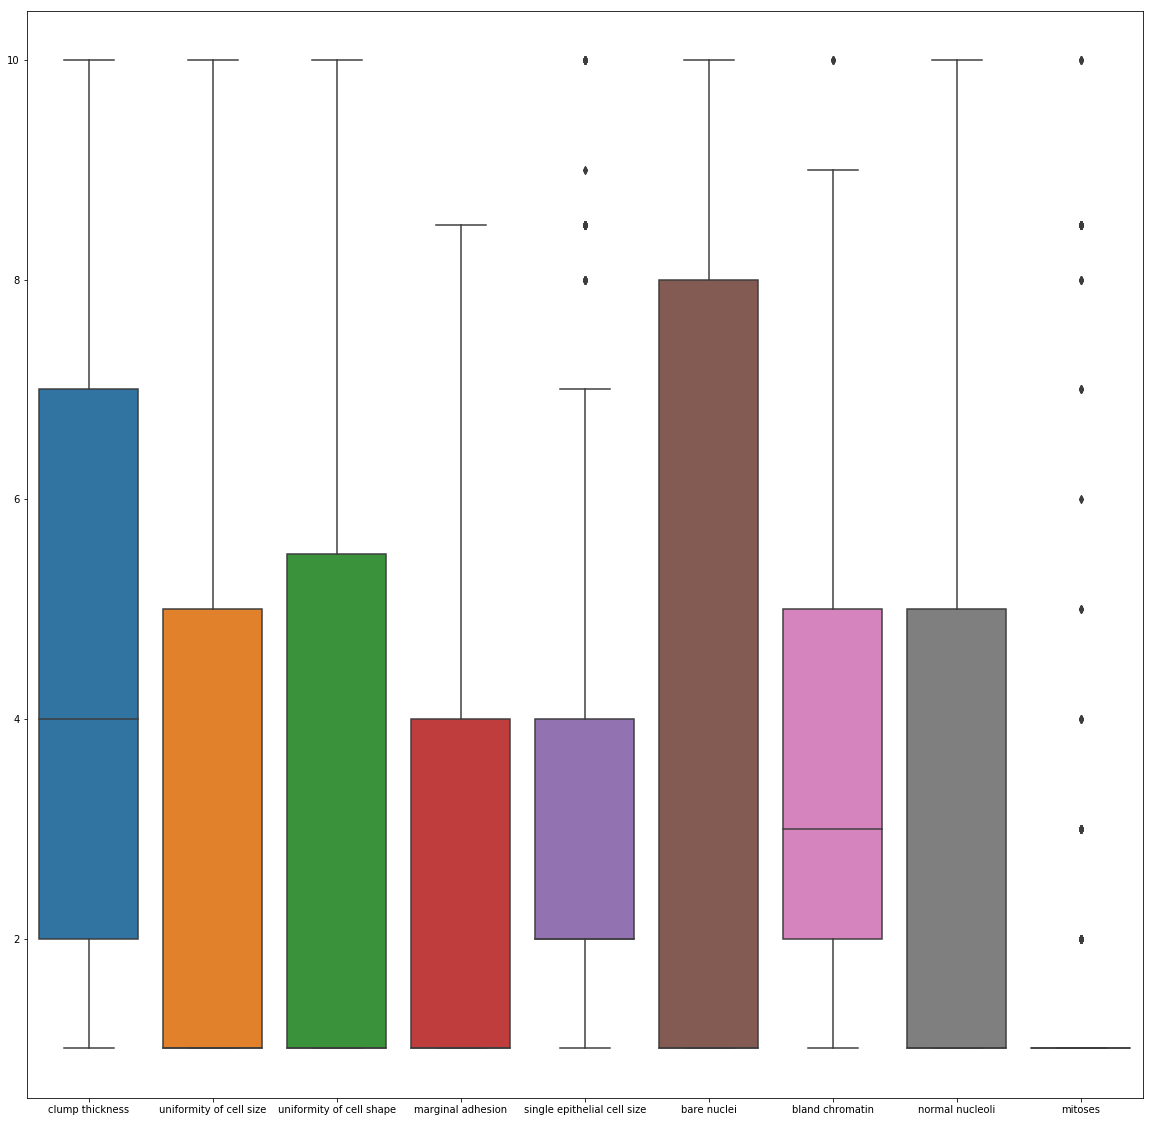

In [17]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.boxplot(ax=ax, data=subset_df)

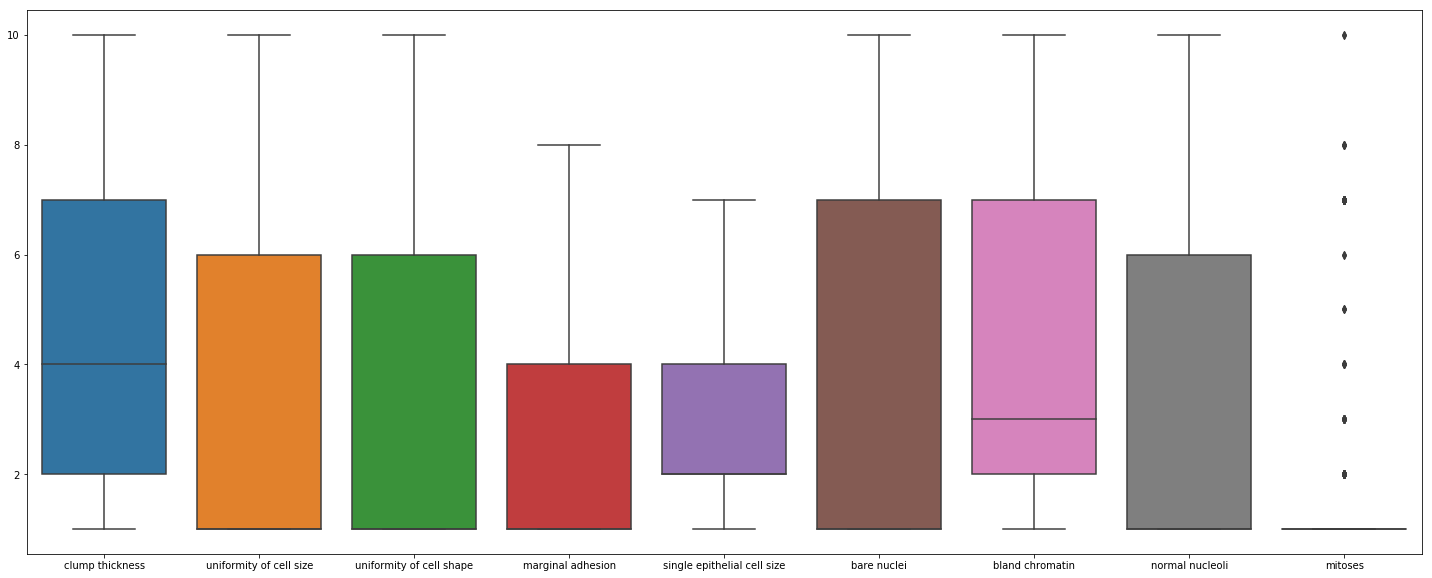

In [18]:
outl = (Q3['single epithelial cell size']+1.5*(IQR['single epithelial cell size']))
df[df['single epithelial cell size']> outl] = outl
subset_df = df[[df.columns[1], df.columns[2], df.columns[3], df.columns[4], df.columns[5], df.columns[6], df.columns[7],
               df.columns[8], df.columns[9]]]
fig, ax = plt.subplots(figsize=(25, 10))
sns.boxplot(ax=ax, data=subset_df)

### k. Data transformation

In [19]:
df.dtypes

sample code number             float64
clump thickness                float64
uniformity of cell size        float64
uniformity of cell shape       float64
marginal adhesion              float64
single epithelial cell size    float64
bare nuclei                    float64
bland chromatin                float64
normal nucleoli                float64
mitoses                        float64
class                          float64
dtype: object

In [20]:
for col in df.columns:
    df[col] = [x if x!='?' else np.nan for x in df[col]]
df = df.dropna()

In [21]:
X = np.array(df.iloc[:, :])
y = np.array(df['class'])
# X = X.reshape([683,11])

### Data Model Building

In [22]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.20)

In [23]:
reg = LogisticRegression()
reg.fit(X_train, y_train)
ypred = reg.predict(X_test)
print(sk.metrics.confusion_matrix(y_test, ypred))
acc = reg.score(X_test, y_test)
acc

[[84  0  0]
 [27  0  0]
 [26  0  0]]


0.61313868613138689

In [24]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
ypred = gnb.predict(X_test)
acc2 = gnb.score(X_test, y_test)
acc2

0.8029197080291971